# Rapidly measuring spatial accessibility of COVID-19 healthcare resources: a case study of Illinois, USA

This notebook briefly walks through calculating spatial accessibility to hospital ventilators in across the state of Illinois. This work uses the code from the following paper:

> Kang, JY., Michels, A., Lyu, F. et al. Rapidly measuring spatial accessibility of COVID-19 healthcare resources: a case study of Illinois, USA. Int J Health Geogr 19, 36 (2020). https://doi.org/10.1186/s12942-020-00229-x

**Paper Authors:** Jeon-Young Kang, Alexander Michels, Fangzheng Lyu, Shaohua Wang, Nelson Agbodo, Vincent L. Freeman & Shaowen Wang

**Notebook Authors:** Alexander Michels, Zimo Xiao, Anand Padmanabhan, Zhiyu Li, Shaowen Wang, Mit Kotak and Taylor Ziegler

In [1]:
import contextily as cx
import geopandas as gpd
import os

In [2]:
from cybergis_compute_client import CyberGISCompute

cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")

In [3]:
cybergis.show_ui()

In [4]:
download_path = cybergis.recentDownloadPath
print(f"Our outputs are at {download_path}")

Our outputs are at /home/jovyan/work/globus_download_1658181153BBScH


In [5]:
!ls {download_path}

map.png  result.geojson  slurm_log


In [6]:
result_path = os.path.join(download_path, "result.geojson")
gdf = gpd.read_file(result_path)
gdf.head()

left           top        right        bottom    id         area  \
0  271377.129808  4.361113e+06  277150.6325  4.356113e+06  5072  21640788.47   
1  271377.129808  4.326113e+06  277150.6325  4.321113e+06  5079  21640786.83   
2  271377.129808  4.331113e+06  277150.6325  4.326113e+06  5078  21640786.18   
3  271377.129808  4.336113e+06  277150.6325  4.331113e+06  5077  21640787.63   
4  271377.129808  4.341113e+06  277150.6325  4.336113e+06  5076  21640787.37   

   hospital_vents                                           geometry  
0        0.000081  POLYGON ((271377.130 4358613.330, 272820.505 4...  
1        0.000049  POLYGON ((271377.130 4323613.330, 272820.505 4...  
2        0.000131  POLYGON ((271377.130 4328613.330, 272820.505 4...  
3        0.000131  POLYGON ((271377.130 4333613.330, 272820.505 4...  
4        0.000153  POLYGON ((271377.130 4338613.330, 272820.505 4...

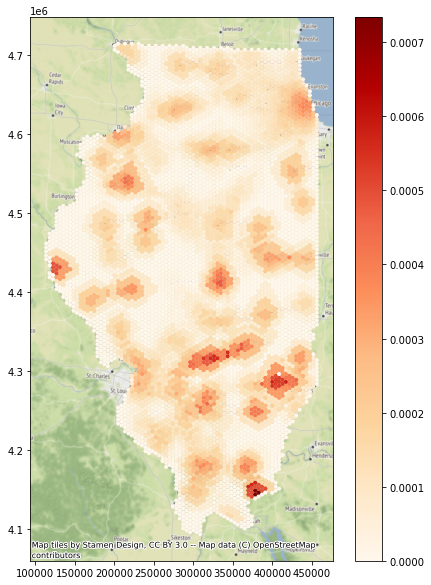

In [7]:
ax = gdf.plot(column="hospital_vents", cmap="OrRd", figsize=(8,10), legend=True)
cx.add_basemap(ax, crs=gdf.crs.to_string())

In [8]:
gdf.explore(column="hospital_vents", cmap="OrRd")